In [ ]:
#We need a multivariate time series dataset, such as macroeconomic indicators, stock prices, or financial data.
#Vector Autoregression (VAR) is a statistical tool used to investigate the dynamic relationships between multiple time series variables. 
#Unlike univariate autoregressive models, which only forecast a single variable based on its previous values, 
#VAR models investigate the interconnectivity of many variables. 
#They accomplish this by modeling each variable as a function of not only its previous values but also of the past values of other variables in the system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Load dataset (example: macroeconomic data)
url = "https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv"
data = pd.read_csv(url, index_col='date')


In [2]:
data.head()

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


In [ ]:
#time series dataset with macroeconomic variables.
#date: Time period (quarterly data from 1959).
#rgnp: Real Gross National Product.
#pgnp: Predicted Gross National Product.
#ulc: Unit Labor Cost.
#gdfco: Gross Domestic Fixed Capital Formation.
#gdf: Gross Domestic Factor Cost.
#gdfim: Gross Domestic Investment.
#gdfcf: Gross Domestic Capital Formation.
#gdfce: Gross Domestic Final Consumption Expenditure.

In [3]:
# Select relevant variables
df = data[['rgnp', 'ulc', 'gdf']]
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')  # Convert index to datetime

In [4]:
df.head()

,rgnp,ulc,gdf
date,,,
1959-01-01,1606.4,47.5,37.4
1959-04-01,1637.0,47.5,37.5
1959-07-01,1629.5,48.7,37.6
1959-10-01,1643.4,48.8,37.8
1960-01-01,1671.6,49.1,37.8


In [5]:
#VAR models require stationary data, so we check for stationarity using the Augmented Dickey-Fuller (ADF) test.

In [6]:
from statsmodels.tsa.stattools import adfuller
##ADF TEST
#Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
#Alternate Hypothesis(HA): Series is stationary, or series has no unit root.
#p-value < 0.05 – Reject Null Hypothesis(HO)

In [7]:
# Check for stationarity
def adf_test(series):
    result = adfuller(series)
    return result[1]  # p-value

In [8]:
adf_test(df['rgnp'])

0.9886037114305949

In [9]:
adf_test(df['ulc'])

0.9970991728829679

In [10]:
adf_test(df['gdf'])

0.9953249001658118

In [11]:
#all are not stationary

In [12]:
# Differencing if necessary
df_diff = df.diff().dropna()  # First-order differencing

In [13]:
adf_test(df_diff['rgnp'])

2.9633019848468996e-06

In [14]:
adf_test(df_diff['ulc'])

0.0062351318302382

In [15]:
adf_test(df_diff['gdf'])

0.5823703618159304

In [17]:
df_diff_diff = df.diff().diff().dropna()  # Second-order differencing

In [18]:
adf_test(df_diff_diff['gdf'])

0.000397026110776862

In [13]:
#Choosing the correct lag length (p) is crucial. We use Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC).
##In a Vector Autoregressive (VAR) model, a lag refers to the number of past observations used to predict the current values of the time series variables.

In [19]:
# Select optimal lag length
model = VAR(df)
lag_selection = model.select_order(maxlags=10)
optimal_lag = lag_selection.aic  # Using AIC-selected lag

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [20]:
print(lag_selection.summary()) 

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        19.76       19.83   3.819e+08       19.79
1        3.105       3.395       22.31       3.223
2        2.539      3.046*       12.68      2.745*
3        2.505       3.229       12.27       2.799
4       2.428*       3.369      11.37*       2.810
5        2.433       3.591       11.46       2.903
6        2.430       3.805       11.47       2.988
7        2.442       4.035       11.67       3.088
8        2.505       4.315       12.52       3.239
9        2.446       4.474       11.92       3.269
10       2.493       4.738       12.64       3.404
--------------------------------------------------


In [21]:
print(optimal_lag)

4


In [17]:
#Once we have the optimal lag length, we fit the VAR model.

In [22]:
# Fit VAR model
var_model = VAR(df)
results = var_model.fit(optimal_lag)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Mar, 2025
Time:                     11:58:49
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    3.20391
Nobs:                     119.000    HQIC:                   2.66295
Log likelihood:          -604.001    FPE:                    9.93169
AIC:                      2.29310    Det(Omega_mle):         7.27683
--------------------------------------------------------------------
Results for equation rgnp
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -1.971501        18.061171           -0.109           0.913
L1.rgnp         1.058446         0.120276            8.800           0.000
L1.ulc         -2.737284         3.999672           -0.684           0.494
L1.gdf    

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [19]:
#After fitting, ensure that the residuals (errors) are uncorrelated and normally distributed

In [23]:
# Check for autocorrelation in residuals (Ljung-Box test)
from statsmodels.stats.diagnostic import acorr_ljungbox

for col in results.resid.columns:
    print(f"\nLjung-Box Test for {col}:")
    lb_test = acorr_ljungbox(results.resid[col], lags=[10], return_df=True)
    print(lb_test)



Ljung-Box Test for rgnp:
     lb_stat  lb_pvalue
10  5.702994   0.839569

Ljung-Box Test for ulc:
     lb_stat  lb_pvalue
10  7.372204   0.689901

Ljung-Box Test for gdf:
     lb_stat  lb_pvalue
10  6.747543   0.749044


In [ ]:
#If p-value > 0.05, residuals are white noise (good model fit).

In [24]:
# Forecast next 5 periods
forecast_steps = 5
forecast_values = results.forecast(df.values[-optimal_lag:], steps=forecast_steps)

# Convert to DataFrame
forecast_df = pd.DataFrame(forecast_values, columns=df.columns)
print(forecast_df)

          rgnp         ulc         gdf
0  4166.959372  189.313153  131.370846
1  4190.868576  191.242227  132.568128
2  4216.788958  192.456089  133.682473
3  4245.458366  193.698987  134.751848
4  4271.984938  195.080479  135.852568


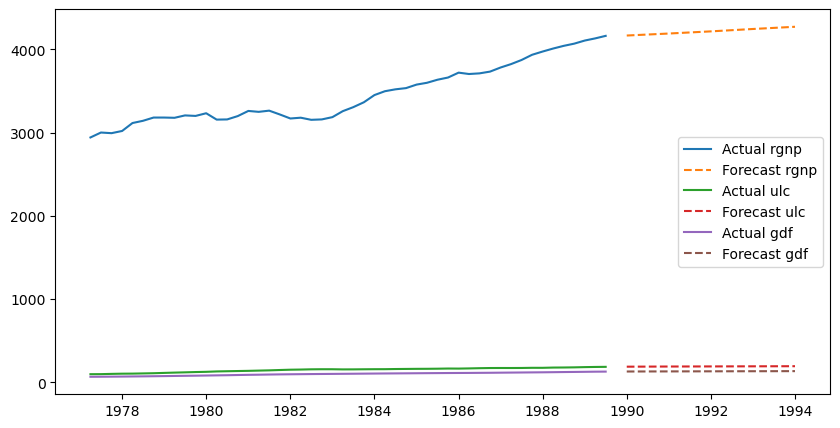

In [25]:
plt.figure(figsize=(10, 5))
for col in df.columns:
    plt.plot(df.index[-50:], df[col].iloc[-50:], label=f'Actual {col}')
    plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='Y'), forecast_df[col], linestyle='dashed', label=f'Forecast {col}')
plt.legend()
plt.show()

In [26]:
#1 Load and visualize the dataset.
#2 Check for stationarity (ADF test).
️#3 If needed, differencing to make data stationary.️
#4 Choose optimal lag length using AIC/BIC.️
#5 Fit the VAR model.️
#6 Perform residual diagnostics.
️#7 Forecast future values.
️#8 Plot the forecast vs actual.

SyntaxError: invalid character '️' (U+FE0F) (2095145979.py, line 3)